In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
n = 36
z = 1
n1, n2, n5, n8, n11, n17, n35 = 6, 9, 22, 24, 26, 60, 37

In [9]:
f = np.zeros(n)
f[1], f[2], f[5], f[8], f[11], f[17], f[35] = n1, n2, n5, n8, n11, n17, n35
f /= np.sum(f)

In [5]:
p = lambda d: n / (n + z) / (d + 1)
p_g = 1 - f @ p(np.arange(n))

In [36]:
c = np.vectorize(lambda l: f[l:] @ p(np.arange(l, n)))
Q = np.append(c(np.arange(1, n)), -p_g)
x = np.roots(Q)
r = 1 / x

In [56]:
V = np.vander(x)
mu = -np.ones(n - 1) @ np.linalg.inv(V)
mu_real = -np.real(np.exp(np.sum(np.log((1 - x[:-1]) / (x[-1] - x[:-1])))))  # Quick leading term

In [54]:
q = np.vectorize(lambda k: 1 + np.real(mu @ r ** k))

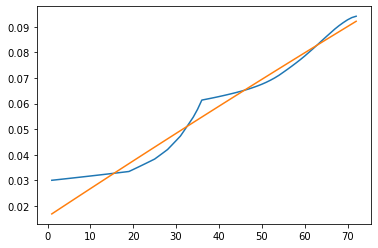

In [63]:
k = np.arange(1, 2 * n + 1)
q_k = q(k)

plt.plot(k, q_k)
plt.plot(k, 1 + mu_real * np.real(r[-1]) ** k)
plt.show()

In [76]:
float(q(1)), z / (n + z) / p_g

(0.030021210637961038, 0.03002121063795073)

In [77]:
def phi(u0, n):
    """
    # n: Nombre de numéros sur la roulette (sans compter le 0: nomnbre total avec le 0 est n+1)
    """
    M = 100  # Nombre de trajectoires
    N = 2000 # Durée totale (en s)
    T = np.arange(N)  # Indices des temps
    c = 1  # Débit d'argent rentrant (en €/tour)
    lam = 1 / (n + 1)
    dS = np.hstack((np.zeros((M, 1)), n * (np.random.random((M, N - 1)) < lam)))
    S = np.cumsum(dS, axis=1)
    u = u0 + c * T - S
    u_alive = ~np.cumsum(u<=0, axis=1).astype(bool)
    phi = np.mean(u_alive, axis=0)
    return phi[-1]

vphi = np.vectorize(phi)

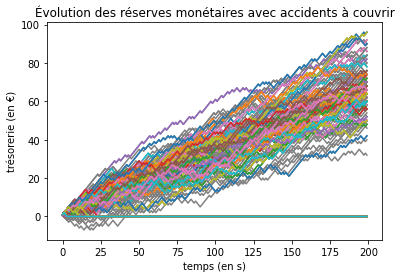

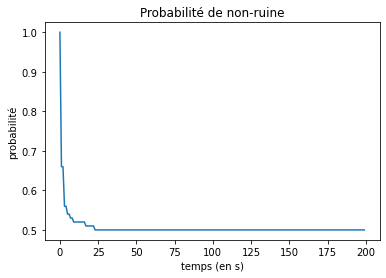

<ipython-input-78-5d5609f60842>:30: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(phi - phi[-1]))


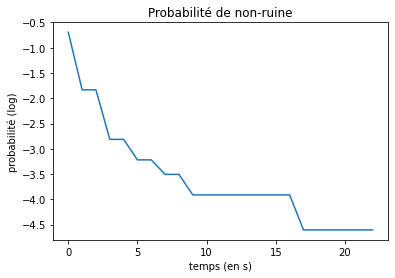

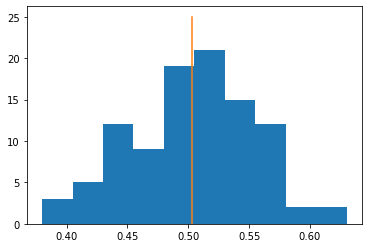

In [78]:
u0 = 1
n = 2  # Nombre de numéros sur la roulette (sans compter le 0: nomnbre total avec le 0 est n+1)
M = 100  # Nombre de trajectoires
N = 200 # Durée totale (en s)
T = np.arange(N)  # Indices des temps
c = 1  # Débit d'argent rentrant (en €/tour)
lam = 1 / (n + 1)
dS = np.hstack((np.zeros((M, 1)), n * (np.random.random((M, N - 1)) < lam)))
S = np.cumsum(dS, axis=1)
u = u0 + c * T - S
u_alive = ~np.cumsum(u<=0, axis=1).astype(bool)
u_cutted = u*(u_alive)
phi = np.mean(u_alive, axis=0)
expt = vphi(u0, n * np.ones(100))
phi_inf = np.mean(expt)
plt.title("Évolution des réserves monétaires avec accidents à couvrir")
plt.xlabel("temps (en s)")
plt.ylabel("trésorerie (en €)")
plt.plot(u.T, c='gray')
plt.plot(u_cutted.T)
plt.show()
plt.title("Probabilité de non-ruine")
plt.xlabel("temps (en s)")
plt.ylabel("probabilité")
plt.plot(phi)
plt.show()
plt.title("Probabilité de non-ruine")
plt.xlabel("temps (en s)")
plt.ylabel("probabilité (log)")
plt.plot(np.log(phi - phi[-1]))
plt.show()
plt.hist(expt)
plt.plot([phi_inf, phi_inf], [0, 25])
plt.show()